In [66]:
import pandas as pd 
import numpy as np
import glob
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:
# Import
demographics = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/demographic_results/demographics_processed.csv')

# Set the path to the directory containing the CSV files
folder_path = '/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/click_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
clicks = pd.concat(dfs_list, ignore_index=True)

# Set the path to the directory containing the CSV files
folder_path = '/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/legend_click_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
legend_clicks = pd.concat(dfs_list, ignore_index=True)

# Set the path to the directory containing the CSV files
folder_path = '/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/hover_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
hover_events = pd.concat(dfs_list, ignore_index=True)

# Set the path to the directory containing the CSV files
folder_path = '/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/timing_results'
# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
# Store DataFrames in a list
dfs_list = [pd.read_csv(file) for file in csv_files]
# Combine dfs
page_visits = pd.concat(dfs_list, ignore_index=True)

/tmp/ipykernel_2025/569877031.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hover_events = pd.concat(dfs_list, ignore_index=True)


In [37]:
# Drop demo and tim
clicks = clicks[(clicks['user_id']!='Tim')&(clicks['user_id']!='demo')]
legend_clicks = legend_clicks[(legend_clicks['user_id']!='Tim')&(legend_clicks['user_id']!='demo')]
hover_events = hover_events[(hover_events['user_id']!='Tim')&(hover_events['user_id']!='demo')]
page_visits = page_visits[(page_visits['user_id']!='Tim')&(page_visits['user_id']!='demo')]

# hover_events

In [4]:
# Order of seeing CDSS (1) or SOC (2)
# a and b are opposites of each other
# a = 122121122112
# b = 211212211221
a_list = [1,2,2,1,2,1,1,2,2,1,1,2]
b_list = [2,1,1,2,1,2,2,1,1,2,2,1]

# Define if see cdss or soc
def view_fun(row):
    patient = row['patient']
    user_archetype = row['user_archetype']
    if user_archetype == 'a':
        view = a_list[patient-1]
    elif user_archetype == 'b':
        view = b_list[patient-1]
    if view == 1:
        return 'cdss'
    elif view == 2:
        return 'soc'

hover_events['view'] = hover_events.apply(lambda row: view_fun(row), axis=1)

In [5]:
hover_events

,user_id,user_archetype,patient,component,hover_duration,view
0,5,b,1,patient_details_imddecil:,0.249,soc
1,5,b,1,patient_details_ethnicity:,0.196,soc
2,5,b,1,patient_details_imddecil:,0.048,soc
3,5,b,1,patient_details_co-morbidities:,0.067,soc
4,5,b,1,patient_details_ethnicity:,4.021,soc
...,...,...,...,...,...,...
21744,7,b,12,vitals_table_Glasgow Coma Score,0.118,cdss
21745,7,b,12,vitals_table_Glasgow Coma Score,0.136,cdss
21746,7,b,12,echarts_plot,0.102,cdss
21747,7,b,12,vitals_table_Glasgow Coma Score,0.152,cdss


In [7]:
component_hover_duration = hover_events.groupby('component')['hover_duration'].sum().reset_index()
component_hover_duration = component_hover_duration.sort_values(by='hover_duration', ascending=False).reset_index(drop=True)
component_hover_duration

,component,hover_duration
0,echarts_plot,4279.793
1,vitals_table_Systolic Blood Pressure,946.451
2,guidelines_pdf_simple,918.313
3,vitals_table_Respiratory Rate,908.215
4,vitals_table_Diastolic Blood Pressure,682.674
5,vitals_table_Temperature,660.001
6,vitals_table_Heart Rate,570.148
7,vitals_table_Glasgow Coma Score,471.650
8,vitals_table_SpO2,464.125
9,vitals_table_Metric / Time (hours),389.904


In [8]:
# Grouping components into broader catergories 

# Define a function to categorize the components
def categorize_component(component_str):
    categories = ['vitals_table', 'similar_table', 'patient_details', 'guidelines_pdf', 'LLM']
    for category in categories:
        if category in component_str:
            return category
    return component_str

# Apply the categorization function to create the new column
hover_events['component_categories'] = hover_events['component'].apply(categorize_component)
component_hover_duration = hover_events.groupby('component_categories')['hover_duration'].sum().reset_index()
component_hover_duration = component_hover_duration.sort_values(by='hover_duration', ascending=False).reset_index(drop=True)
component_hover_duration

,component_categories,hover_duration
0,vitals_table,6703.443
1,echarts_plot,4279.793
2,guidelines_pdf,1214.794
3,patient_details,1107.775
4,similar_table,416.022
5,guidelines_flowchart,212.856
6,LLM,176.641
7,patient_table,163.515
8,feature_image,130.263
9,guideline_alert,82.910


In [ ]:
# similar_table most out of all exsplanability 

In [9]:
# Grouping by patient as well

component_hover_duration = hover_events.groupby(['component_categories', 'patient'])['hover_duration'].sum().reset_index()
component_hover_duration = component_hover_duration.sort_values(by='hover_duration', ascending=False).reset_index(drop=True)
component_hover_duration

,component_categories,patient,hover_duration
0,echarts_plot,8,754.052
1,vitals_table,3,725.470
2,vitals_table,7,693.954
3,vitals_table,8,664.879
4,vitals_table,11,660.340
...,...,...,...
122,LLM,9,0.945
123,patient_table,1,0.746
124,guideline_alert,9,0.446
125,feature_image,3,0.306


# page_visits

In [38]:
page_visits

,user_id,user_archetype,page_name,entry_time,exit_time
0,15,b,/,2024-06-17 11:33:13.977045+00:00,2024-06-17 11:33:14.131926+00:00
1,15,b,/details,2024-06-17 11:33:14.140396+00:00,2024-06-17 11:33:39.016139+00:00
2,15,b,/patients,2024-06-17 11:33:39.023910+00:00,2024-06-17 11:33:41.556147+00:00
3,15,b,/1/,2024-06-17 11:33:41.563947+00:00,2024-06-17 11:33:44.448222+00:00
4,15,b,/record_hover_event/,2024-06-17 11:33:44.453483+00:00,2024-06-17 11:34:42.400927+00:00
...,...,...,...,...,...
2353,10,a,/12/process_user_input/,2024-06-10 10:34:41.446511+00:00,2024-06-10 10:34:41.532564+00:00
2354,10,a,/patients,2024-06-10 10:34:41.542251+00:00,2024-06-10 10:34:48.253354+00:00
2355,10,a,/sus,2024-06-10 10:34:48.265449+00:00,2024-06-10 10:34:48.433554+00:00
2356,10,a,/sus/,2024-06-10 10:34:48.446694+00:00,2024-06-10 10:36:29.867533+00:00


In [39]:
pd.set_option('display.max_rows', 100)


In [40]:
# Convert 'entry_time' and 'exit_time' columns to datetime
page_visits['entry_time'] = pd.to_datetime(page_visits['entry_time'])
page_visits['exit_time'] = pd.to_datetime(page_visits['exit_time'])

# Old code
'''# Iterate over DataFrame and update exit_time
for index, row in page_visits.iterrows():
    if row['page_name'] == '/record_hover_event/' and index > 0:
        previous_exit_time = page_visits.at[index - 1, 'exit_time']
        if row['exit_time'] > previous_exit_time:
            page_visits.at[index - 1, 'exit_time'] = row['exit_time']
    if row['page_name'] == '/save_legend_click/' and index > 0:
        previous_exit_time = page_visits.at[index - 1, 'exit_time']
        if row['exit_time'] > previous_exit_time:
            page_visits.at[index - 1, 'exit_time'] = row['exit_time']

# Drop pages / rows we dont care about
page_visits = page_visits[~page_visits['page_name'].str.contains('favicon|process_user_input|track_link_click|record_hover_event|save_legend_click')]
page_visits = page_visits[page_visits['page_name'] != '/']'''

# Identify all `/int/process_user_input/` rows
process_user_input_rows = page_visits[page_visits['page_name'].str.contains('process_user_input')]

# Create a dictionary to map `/int/` page names to their corresponding `/int/process_user_input/` exit times for each user_id
exit_time_mapping = {}
for _, row in process_user_input_rows.iterrows():
    user_id = row['user_id']
    # Extract the `/int/` part from `/int/process_user_input/`
    int_page_name = row['page_name'].split('/process_user_input/')[0] + '/'
    
    if user_id not in exit_time_mapping:
        exit_time_mapping[user_id] = {}
    
    exit_time_mapping[user_id][int_page_name] = row['exit_time']

# Function to update exit_time based on the mapping
def update_exit_time(row):
    user_id = row['user_id']
    page_name = row['page_name']
    
    # Check if the current page_name is an `/int/` and if we have a mapping for it
    if page_name in exit_time_mapping.get(user_id, {}):
        return exit_time_mapping[user_id][page_name]
    
    return row['exit_time']

# Create a new DataFrame to hold the updated data
updated_page_visits = page_visits.copy()
updated_page_visits['exit_time'] = updated_page_visits.apply(update_exit_time, axis=1)

# Filter to keep only `/int/` rows for the new DataFrame
updated_page_visits = updated_page_visits[updated_page_visits['page_name'].str.fullmatch(r'/\d+/')]

# Calculate visit duration in seconds
updated_page_visits['visit_duration'] = (updated_page_visits['exit_time'] - updated_page_visits['entry_time']).dt.total_seconds()

# Drop duplicates
updated_page_visits.drop_duplicates(subset=['user_id', 'page_name'], inplace=True)

# Group by
grouped_page_visits = updated_page_visits.groupby(['page_name'])['visit_duration'].sum().reset_index()
grouped_page_visits = grouped_page_visits.sort_values(by='visit_duration', ascending=False).reset_index(drop=True)
grouped_page_visits

"# Iterate over DataFrame and update exit_time\nfor index, row in page_visits.iterrows():\n    if row['page_name'] == '/record_hover_event/' and index > 0:\n        previous_exit_time = page_visits.at[index - 1, 'exit_time']\n        if row['exit_time'] > previous_exit_time:\n            page_visits.at[index - 1, 'exit_time'] = row['exit_time']\n    if row['page_name'] == '/save_legend_click/' and index > 0:\n        previous_exit_time = page_visits.at[index - 1, 'exit_time']\n        if row['exit_time'] > previous_exit_time:\n            page_visits.at[index - 1, 'exit_time'] = row['exit_time']\n\n# Drop pages / rows we dont care about\npage_visits = page_visits[~page_visits['page_name'].str.contains('favicon|process_user_input|track_link_click|record_hover_event|save_legend_click')]\npage_visits = page_visits[page_visits['page_name'] != '/']"

,page_name,visit_duration
0,/7/,6382.121092
1,/8/,6238.004143
2,/10/,5066.762580
3,/3/,5030.524588
4,/2/,4895.524317
5,/11/,4886.224264
6,/12/,4878.171996
7,/1/,4838.074765
8,/6/,4826.886822
9,/4/,3936.515985


In [42]:
# Grouping page_name into patients

# Define a function to group page_name by patients
def categorize_page_name(component_str):
    categories = [str(element) for element in list(range(13))]
    categories.reverse() # Reverse so looks for higher numbers first
    for category in categories:
        if category in component_str:
            #print('category:', category)
            return category
    #print(component_str)
    return component_str

# Apply the categorization function to create the new column
updated_page_visits['page_name_categories'] = updated_page_visits['page_name'].apply(categorize_page_name)
grouped_page_visits = updated_page_visits.groupby('page_name_categories')['visit_duration'].mean().reset_index()
grouped_page_visits = grouped_page_visits.sort_values(by='visit_duration', ascending=False).reset_index(drop=True)
grouped_page_visits

,page_name_categories,visit_duration
0,7,193.397609
1,8,189.030429
2,2,157.920139
3,3,157.203893
4,1,156.066928
5,10,149.022429
6,6,146.269298
7,11,139.606408
8,12,135.504778
9,4,123.016125


In [43]:
updated_page_visits

,user_id,user_archetype,page_name,entry_time,exit_time,visit_duration,page_name_categories
3,15,b,/1/,2024-06-17 11:33:41.563947+00:00,2024-06-17 11:34:42.594794+00:00,61.030847,1
7,15,b,/2/,2024-06-17 11:34:44.931904+00:00,2024-06-17 11:35:47.139182+00:00,62.207278,2
11,15,b,/3/,2024-06-17 11:35:49.088784+00:00,2024-06-17 11:37:09.671533+00:00,80.582749,3
15,15,b,/4/,2024-06-17 11:37:19.582371+00:00,2024-06-17 11:39:22.970173+00:00,123.387802,4
19,15,b,/5/,2024-06-17 11:38:11.448290+00:00,2024-06-17 11:40:28.384418+00:00,136.936128,5
...,...,...,...,...,...,...,...
2322,10,a,/8/,2024-06-10 10:20:28.088681+00:00,2024-06-10 10:23:52.159714+00:00,204.071033,8
2326,10,a,/9/,2024-06-10 10:23:54.401972+00:00,2024-06-10 10:24:55.503170+00:00,61.101198,9
2330,10,a,/10/,2024-06-10 10:24:58.402123+00:00,2024-06-10 10:28:30.673384+00:00,212.271261,10
2339,10,a,/11/,2024-06-10 10:28:33.202014+00:00,2024-06-10 10:32:22.143878+00:00,228.941864,11


In [14]:
# Mean time for case vignett 
grouped_page_visits['visit_duration'].mean()

146.58748086191815

In [15]:
# Order of seeing CDSS (1) or SOC (2)
# a and b are opposites of each other
# a = 122121122112
# b = 211212211221
a_list = [1,2,2,1,2,1,1,2,2,1,1,2]
b_list = [2,1,1,2,1,2,2,1,1,2,2,1]

# Define if see cdss or soc
def view_fun(row):
    patient = row['patient']
    user_archetype = row['user_archetype']
    if user_archetype == 'a':
        view = a_list[patient-1]
    elif user_archetype == 'b':
        view = b_list[patient-1]
    if view == 1:
        return 'cdss'
    elif view == 2:
        return 'soc'

# filter
patient_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
filtered_page_visits = updated_page_visits[updated_page_visits['page_name_categories'].isin(patient_list)]
filtered_page_visits['patient'] = filtered_page_visits['page_name_categories'].astype(int)
filtered_page_visits['view'] = filtered_page_visits.apply(lambda row: view_fun(row), axis=1)

In [16]:
filtered_page_visits

,user_id,user_archetype,page_name,entry_time,exit_time,visit_duration,page_name_categories,patient,view
3,15,b,/1/,2024-06-17 11:33:41.563947+00:00,2024-06-17 11:34:42.594794+00:00,61.030847,1,1,soc
7,15,b,/2/,2024-06-17 11:34:44.931904+00:00,2024-06-17 11:35:47.139182+00:00,62.207278,2,2,cdss
11,15,b,/3/,2024-06-17 11:35:49.088784+00:00,2024-06-17 11:37:09.671533+00:00,80.582749,3,3,cdss
15,15,b,/4/,2024-06-17 11:37:19.582371+00:00,2024-06-17 11:39:22.970173+00:00,123.387802,4,4,soc
19,15,b,/5/,2024-06-17 11:38:11.448290+00:00,2024-06-17 11:40:28.384418+00:00,136.936128,5,5,cdss
...,...,...,...,...,...,...,...,...,...
2322,10,a,/8/,2024-06-10 10:20:28.088681+00:00,2024-06-10 10:23:52.159714+00:00,204.071033,8,8,soc
2326,10,a,/9/,2024-06-10 10:23:54.401972+00:00,2024-06-10 10:24:55.503170+00:00,61.101198,9,9,soc
2330,10,a,/10/,2024-06-10 10:24:58.402123+00:00,2024-06-10 10:28:30.673384+00:00,212.271261,10,10,cdss
2339,10,a,/11/,2024-06-10 10:28:33.202014+00:00,2024-06-10 10:32:22.143878+00:00,228.941864,11,11,cdss


In [17]:
# Grouping page_name into patients

# Define a function to group page_name by patients
def categorize_page_name(component_str):
    categories = [str(element) for element in list(range(13))]
    categories.reverse() # Reverse so looks for higher numbers first
    for category in categories:
        if category in component_str:
            #print('category:', category)
            return category
    #print(component_str)
    return component_str

# Apply the categorization function to create the new column
grouped_filtered_page_visits = filtered_page_visits.groupby(['view', 'patient'])['visit_duration'].mean().reset_index()
grouped_filtered_page_visits.rename(columns={'visit_duration': 'mean_visit_duration'}, inplace=True)
grouped_filtered_page_visits_std = filtered_page_visits.groupby(['view', 'patient'])['visit_duration'].std().reset_index()
grouped_filtered_page_visits_std.rename(columns={'visit_duration': 'std_visit_duration'}, inplace=True)
grouped_filtered_page_visits = pd.merge(grouped_filtered_page_visits, grouped_filtered_page_visits_std)
grouped_filtered_page_visits = grouped_filtered_page_visits.sort_values(by=['patient', 'mean_visit_duration'], ascending=True).reset_index(drop=True)
grouped_filtered_page_visits

,view,patient,mean_visit_duration,std_visit_duration
0,soc,1,140.305125,71.572775
1,cdss,1,170.843619,112.159832
2,cdss,2,127.639092,54.027747
3,soc,2,186.308621,116.696236
4,cdss,3,136.202443,91.435753
5,soc,3,178.205344,103.818022
6,soc,4,103.144680,37.438045
7,cdss,4,142.887569,74.321179
8,soc,5,93.850943,33.948730
9,cdss,5,104.921055,58.596073


In [18]:
# Mean and std
grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()
grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].std()

view
cdss    150.389965
soc     142.087191
Name: mean_visit_duration, dtype: float64

view
cdss    29.173415
soc     38.387819
Name: mean_visit_duration, dtype: float64

In [19]:
mean_cdss = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[0]
mean_soc = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[1]

# Percentage difference
percentage_difference = (abs((mean_soc - mean_cdss)) / ((mean_cdss + mean_soc)/2)) * 100
print(f"Percentage difference: {percentage_difference:.2f}%")
percentage_increase = (abs((mean_cdss - mean_soc)) / mean_cdss) * 100
print(f"Percentage increase: {percentage_increase:.2f}%")
percentage_decrease = ((mean_soc - mean_cdss) / mean_soc) * 100
print(f"Percentage decrease: {percentage_decrease:.2f}%")

Percentage difference: 5.68%
Percentage increase: 5.52%
Percentage decrease: -5.84%


/tmp/ipykernel_2025/1526703106.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_cdss = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[0]
/tmp/ipykernel_2025/1526703106.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_soc = grouped_filtered_page_visits.groupby('view')['mean_visit_duration'].mean()[1]


In [20]:
# Split the data into two groups
cdss_group = grouped_filtered_page_visits[grouped_filtered_page_visits['view'] == 'cdss']['mean_visit_duration']
soc_group = grouped_filtered_page_visits[grouped_filtered_page_visits['view'] == 'soc']['mean_visit_duration']

# Test for normality
shapiro_cdss = stats.shapiro(cdss_group)
shapiro_soc = stats.shapiro(soc_group)

print(f"Shapiro-Wilk test for CDSS group: {shapiro_cdss}")
print(f"Shapiro-Wilk test for SOC group: {shapiro_soc}")

### Also add test for variance - levene_test ###

# Perform the paired t-test if both groups are normally distributed
if shapiro_cdss.pvalue > 0.05 and shapiro_soc.pvalue > 0.05:
    stat, p  = stats.ttest_rel(cdss_group, soc_group)
    print('Ttest Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
else:
    # Perform the Wilcoxon signed-rank test if at least one group is not normally distributed
    stat, p = stats.wilcoxon(cdss_group, soc_group)
    print('wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

Shapiro-Wilk test for CDSS group: ShapiroResult(statistic=0.9767723083496094, pvalue=0.9674259424209595)
Shapiro-Wilk test for SOC group: ShapiroResult(statistic=0.9267820715904236, pvalue=0.3472483456134796)
Ttest Statistics=0.710, p=0.492
Same distribution (fail to reject H0)


In [21]:
stat, p = stats.wilcoxon(cdss_group, soc_group)
print('wilcoxon Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

wilcoxon Statistics=30.000, p=0.519
Same distribution (fail to reject H0)


In [22]:
# Perform Levene's test for equal variances
levene_test = stats.levene(cdss_group, soc_group)
print(f"Levene's test for equal variances: {levene_test}")

Levene's test for equal variances: LeveneResult(statistic=0.6183956224800183, pvalue=0.4400329858825546)


In [45]:
# Merge with demographics
filtered_demographic_page_visits = filtered_page_visits.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Imputation with Mode for categorical columns
filtered_demographic_page_visits['age_new'].fillna(filtered_demographic_page_visits['age_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['sex_new'].fillna(filtered_demographic_page_visits['sex_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['medical_speciality_new'].fillna(filtered_demographic_page_visits['medical_speciality_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['grade_new'].fillna(filtered_demographic_page_visits['grade_new'].mode()[0], inplace=True)
filtered_demographic_page_visits['ai_familiarity_new'].fillna(filtered_demographic_page_visits['ai_familiarity_new'].mode()[0], inplace=True)

In [55]:
# Group
grouped_filtered_demographic_page_visits = pd.DataFrame(filtered_demographic_page_visits.groupby(['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'])['visit_duration'].mean()).reset_index()
grouped_filtered_demographic_page_visits.rename(columns={'visit_duration':'mean_visit_duration'}, inplace=True)

In [61]:
from scipy.stats import f_oneway, kruskal, ttest_ind, mannwhitneyu, shapiro, levene


def check_normality(group):
    if len(group) < 3:
        return False  # Not enough data to perform the test
    stat, p = shapiro(group)
    return p > 0.05

def check_homogeneity(groups):
    stat, p = levene(*groups)
    return p > 0.05

# Function to perform comparative analysis
def comparative_analysis(df, categorical_vars, target_var):
    results = []

    for var in categorical_vars:
        unique_values = df[var].unique()
        groups = [df[df[var] == val][target_var] for val in unique_values]
        
        # Check normality for each group
        normal = all(check_normality(group) for group in groups)
        # Check homogeneity of variances
        homogeneity = check_homogeneity(groups)
        
        if len(unique_values) > 2:
            if normal and homogeneity:
                # ANOVA for more than two groups if assumptions are met
                f_stat, p_value_anova = f_oneway(*groups)
                results.append({
                    'variable': var,
                    'test': 'ANOVA',
                    'stat': f_stat,
                    'p_value': p_value_anova
                })
            else:
                # Kruskal-Wallis for more than two groups if assumptions are not met
                h_stat, p_value_kruskal = kruskal(*groups)
                results.append({
                    'variable': var,
                    'test': 'Kruskal-Wallis',
                    'stat': h_stat,
                    'p_value': p_value_kruskal
                })
        elif len(unique_values) == 2:
            if normal and homogeneity:
                # T-test for two groups if assumptions are met
                t_stat, p_value_ttest = ttest_ind(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'T-test',
                    'stat': t_stat,
                    'p_value': p_value_ttest
                })
            else:
                # Mann-Whitney U for two groups if assumptions are not met
                u_stat, p_value_mannwhitney = mannwhitneyu(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'Mann-Whitney U',
                    'stat': u_stat,
                    'p_value': p_value_mannwhitney
                })

    return pd.DataFrame(results)

# Define demographics
categorical_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']

# Perform comparative analysis
comparative_results_df = comparative_analysis(grouped_filtered_demographic_page_visits, categorical_vars, 'mean_visit_duration')

In [62]:
comparative_results_df

,variable,test,stat,p_value
0,user_archetype,T-test,2.276635,0.029222
1,age_new,Kruskal-Wallis,5.367830,0.251594
2,sex_new,T-test,-0.954232,0.346702
3,medical_speciality_new,Kruskal-Wallis,0.556004,0.906426
4,grade_new,Mann-Whitney U,158.000000,0.792182
5,ai_familiarity_new,Kruskal-Wallis,3.214416,0.359733


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='user_archetype', ylabel='mean_visit_duration'>

Text(0.5, 1.0, 'Box Plot of Mean Visit Duration by User Archetype')

Text(0.5, 0, 'User Archetype')

Text(0, 0.5, 'Mean Visit Duration')

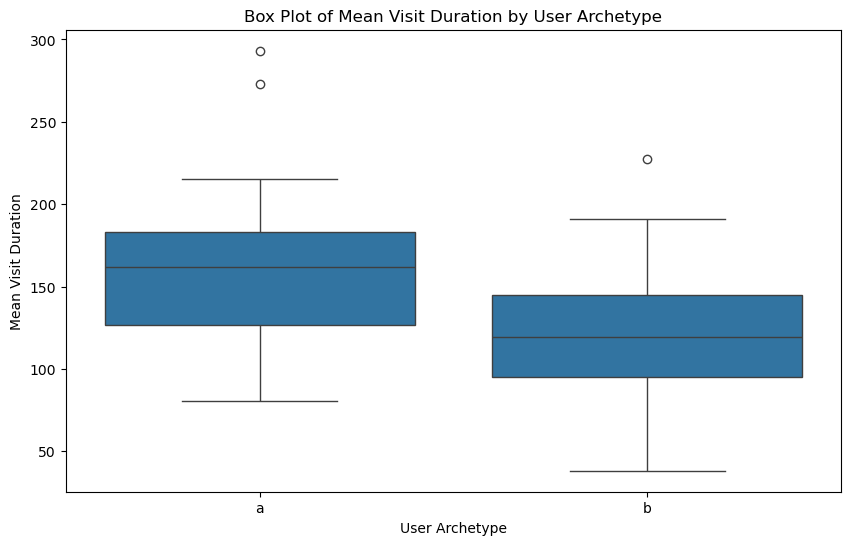

In [68]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_archetype', y='mean_visit_duration', data=grouped_filtered_demographic_page_visits)
plt.title('Box Plot of Mean Visit Duration by User Archetype')
plt.xlabel('User Archetype')
plt.ylabel('Mean Visit Duration')
plt.show()

# clicks

In [69]:
# Define a function to group page_name by patients
def categorize_link_clicks(component_str):
    categories = ['guidelinesLink']
    for category in categories:
        if category in component_str:
            return category
    return component_str

# Apply the categorization function to create the new column
clicks['link_clicks_categories'] = clicks['link_clicks'].apply(categorize_link_clicks)
clicks['link_clicks_categories'].value_counts()

link_clicks_categories
predictiondetailsLink    52
guidelinedetailsLink     19
guidelinesLink            4
Name: count, dtype: int64

In [24]:
clicks.link_clicks.value_counts()
clicks.link_clicks_categories.value_counts()

link_clicks
predictiondetailsLink    52
guidelinedetailsLink     19
guidelinesLink_simple     3
guidelinesLink            1
Name: count, dtype: int64

link_clicks_categories
predictiondetailsLink    52
guidelinedetailsLink     19
guidelinesLink            4
Name: count, dtype: int64

In [26]:
print('percentage that clicked on guideline model: %.2f' % (clicks[clicks['link_clicks']=='guidelinedetailsLink'].user_id.nunique()/len(demographics)*100))

print('percentage that clicked on AI model: %.2f' % (clicks[clicks['link_clicks']=='predictiondetailsLink'].user_id.nunique()/len(demographics)*100))

print('percentage that clicked on guideline link: %.2f' % (clicks[clicks['link_clicks_categories']=='guidelinesLink'].user_id.nunique()/len(demographics)*100))

percentage that clicked on guideline model: 29.73
percentage that clicked on AI model: 48.65
percentage that clicked on guideline link: 10.81


In [27]:
print('percentage that clicked on guideline model (across all scenarios): %.2f' % (clicks[clicks['link_clicks']=='guidelinedetailsLink'].user_id.nunique()/(len(demographics)*6)*100))
# Multiplying by 6 as each participant saw 6 patients with the AI and guideline model
print('percentage that clicked on AI model (across all scenarios): %.2f' % (clicks[clicks['link_clicks']=='predictiondetailsLink'].user_id.nunique()/(len(demographics)*6)*100))
# Multiplying by 12 here as link to ukhsa website was allways presented
print('percentage that clicked on guideline link (across all scenarios): %.2f' % (clicks[clicks['link_clicks_categories']=='guidelinesLink'].user_id.nunique()/(len(demographics)*12)*100))

percentage that clicked on guideline model (across all scenarios): 4.95
percentage that clicked on AI model (across all scenarios): 8.11
percentage that clicked on guideline link (across all scenarios): 0.90


In [28]:
# Patient wise
clicks_filtered = clicks.drop(columns=['user_id', 'user_archetype', 'timestamp', 'link_clicks'])
clicks_filtered = clicks_filtered[clicks_filtered['link_clicks_categories'] != 'guidelinesLink']
clicks_filtered_count = pd.DataFrame(clicks_filtered.groupby(['patient', 'link_clicks_categories']).value_counts())
# Get % - divide by len(demographics)/2 here as for each patient only half of participants could click on these
clicks_filtered_percentage = (clicks_filtered_count/(len(demographics)/2))*100
clicks_filtered_percentage.reset_index(inplace=True)
clicks_filtered_percentage.rename(columns={'count':'percentage'}, inplace=True)
clicks_filtered_percentage.sort_values(by='link_clicks_categories', ascending=False, inplace=True)

In [29]:
clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='predictiondetailsLink']['percentage'].mean()
clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='predictiondetailsLink']['percentage'].std()

clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='guidelinedetailsLink']['percentage'].mean()
clicks_filtered_percentage[clicks_filtered_percentage['link_clicks_categories']=='guidelinedetailsLink']['percentage'].std()

23.423423423423426

11.133592444204048

12.837837837837839

5.733298225836871

In [30]:
clicks_filtered_percentage

,patient,link_clicks_categories,percentage
10,6,predictiondetailsLink,37.837838
8,5,predictiondetailsLink,5.405405
17,11,predictiondetailsLink,32.432432
15,10,predictiondetailsLink,37.837838
14,9,predictiondetailsLink,10.810811
13,8,predictiondetailsLink,21.621622
12,7,predictiondetailsLink,27.027027
1,1,predictiondetailsLink,16.216216
19,12,predictiondetailsLink,16.216216
6,4,predictiondetailsLink,37.837838


<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='patient'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

(0.0, 100.0)

Text(0.5, 1.0, 'Percentage of participants who clicked for explanability by patient')

Text(0.5, 0, 'Patient')

Text(0, 0.5, 'Percentage')

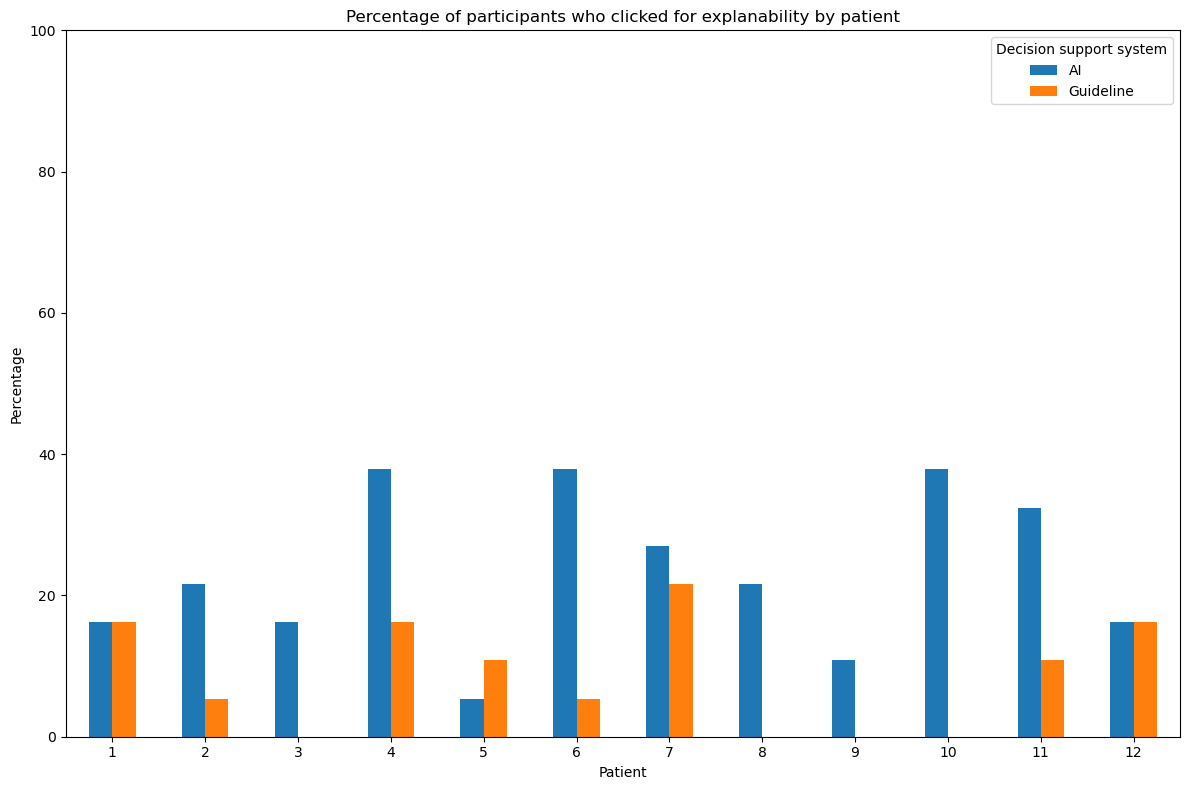

In [33]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Pivot the DataFrame to have 'cdss' and 'soc' as separate columns
pivot_df = clicks_filtered_percentage.pivot(index='patient', columns='link_clicks_categories', values='percentage')

# Reorder columns to ensure 'AI CDSS' comes first
ordered_columns = ['predictiondetailsLink', 'guidelinedetailsLink']
pivot_df = pivot_df[ordered_columns]

# Rename columns for the plot
pivot_df.columns = ['AI', 'Guideline']

# Create a bar plot
pivot_df.plot(kind='bar', ax=plt.gca())

# Rotate x-axis labels
plt.xticks(rotation=0)

# Set y-axis limits
plt.ylim(0, 100)  # 0 to 1 in decimal form, which is 0% to 100%

# Update the legend labels
plt.legend(title='Decision support system')

# Add labels and title
plt.title('Percentage of participants who clicked for explanability by patient')
plt.xlabel('Patient')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

In [85]:
# Demographics

# Get data
guideline_click_count = clicks[clicks['link_clicks'] == 'guidelinedetailsLink'].groupby(['user_id']).count().reset_index().rename(columns={'user_archetype': 'guideline_count'})[['user_id', 'guideline_count']]
ai_click_count = clicks[clicks['link_clicks'] == 'predictiondetailsLink'].groupby(['user_id']).count().reset_index().rename(columns={'user_archetype': 'ai_count'})[['user_id', 'ai_count']]

# Merge
click_count = pd.merge(ai_click_count, guideline_click_count, how='outer')

# Merge with demographics
click_count_demographic = click_count.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Imputation with Mode for categorical columns
click_count_demographic['age_new'].fillna(click_count_demographic['age_new'].mode()[0], inplace=True)
click_count_demographic['sex_new'].fillna(click_count_demographic['sex_new'].mode()[0], inplace=True)
click_count_demographic['medical_speciality_new'].fillna(click_count_demographic['medical_speciality_new'].mode()[0], inplace=True)
click_count_demographic['grade_new'].fillna(click_count_demographic['grade_new'].mode()[0], inplace=True)
click_count_demographic['ai_familiarity_new'].fillna(click_count_demographic['ai_familiarity_new'].mode()[0], inplace=True)

In [89]:
click_count_demographic

,user_id,ai_count,guideline_count,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,0,4.0,2.0,a,30s,Male,Pharmacist,Other,Slightly familiar
1,3,3.0,2.0,b,30s,Female,Infectious Diseases,Other,Not familiar
2,4,1.0,NaN,a,30s,Male,Other,Consultant,Slightly familiar
3,5,3.0,NaN,b,40s,Male,Other,Consultant,Moderately familiar
4,8,2.0,NaN,a,30s,Female,Pharmacist,Other,Slightly familiar
5,10,5.0,1.0,a,30s,Male,Microbiology,Consultant,Very familiar
6,16,3.0,1.0,a,50s,Male,Infectious Diseases,Consultant,Slightly familiar
7,17,1.0,NaN,b,40s,Male,Microbiology,Consultant,Slightly familiar
8,19,1.0,1.0,b,50s,Female,Microbiology,Consultant,Moderately familiar
9,21,5.0,1.0,b,20s,Female,Pharmacist,Other,Not familiar


In [95]:
from scipy.stats import f_oneway, kruskal, ttest_ind, mannwhitneyu, shapiro, levene


def check_normality(group):
    if len(group) < 3:
        return False  # Not enough data to perform the test
    stat, p = shapiro(group)
    return p > 0.05

def check_homogeneity(groups):
    stat, p = levene(*groups)
    return p > 0.05

# Function to perform comparative analysis
def comparative_analysis(df, categorical_vars, target_var):
    results = []

    for var in categorical_vars:
        unique_values = df[var].unique()
        groups = [df[df[var] == val][target_var] for val in unique_values]
        
        # Check normality for each group
        normal = all(check_normality(group) for group in groups)
        # Check homogeneity of variances
        homogeneity = check_homogeneity(groups)
        
        if len(unique_values) > 2:
            if normal and homogeneity:
                # ANOVA for more than two groups if assumptions are met
                f_stat, p_value_anova = f_oneway(*groups)
                results.append({
                    'variable': var,
                    'test': 'ANOVA',
                    'stat': f_stat,
                    'p_value': p_value_anova
                })
            else:
                # Kruskal-Wallis for more than two groups if assumptions are not met
                h_stat, p_value_kruskal = kruskal(*groups)
                results.append({
                    'variable': var,
                    'test': 'Kruskal-Wallis',
                    'stat': h_stat,
                    'p_value': p_value_kruskal
                })
        elif len(unique_values) == 2:
            if normal and homogeneity:
                # T-test for two groups if assumptions are met
                t_stat, p_value_ttest = ttest_ind(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'T-test',
                    'stat': t_stat,
                    'p_value': p_value_ttest
                })
            else:
                # Mann-Whitney U for two groups if assumptions are not met
                u_stat, p_value_mannwhitney = mannwhitneyu(groups[0], groups[1])
                results.append({
                    'variable': var,
                    'test': 'Mann-Whitney U',
                    'stat': u_stat,
                    'p_value': p_value_mannwhitney
                })

    return pd.DataFrame(results)

# Define demographics
categorical_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']

# Perform comparative analysis
ai_comparative_results_df = comparative_analysis(click_count_demographic.drop(columns=['guideline_count']).dropna(), categorical_vars, 'ai_count') # Drop na or just get nan
guideline_comparative_results_df = comparative_analysis(click_count_demographic.drop(columns=['ai_count']).dropna(), categorical_vars, 'guideline_count') # Drop na or just get nan

In [96]:
ai_comparative_results_df

,variable,test,stat,p_value
0,user_archetype,Mann-Whitney U,58.500000,0.100903
1,age_new,Kruskal-Wallis,2.594915,0.458382
2,sex_new,T-test,-0.490973,0.630111
3,medical_speciality_new,Kruskal-Wallis,3.856225,0.277414
4,grade_new,Mann-Whitney U,50.500000,0.362094
5,ai_familiarity_new,Kruskal-Wallis,4.586478,0.204705


In [97]:
guideline_comparative_results_df

,variable,test,stat,p_value
0,user_archetype,Mann-Whitney U,18.000000,0.458318
1,age_new,Kruskal-Wallis,5.785714,0.215733
2,sex_new,Mann-Whitney U,18.000000,0.458318
3,medical_speciality_new,Kruskal-Wallis,2.473810,0.480043
4,grade_new,Mann-Whitney U,21.000000,0.260214
5,ai_familiarity_new,Kruskal-Wallis,1.997619,0.572901


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='user_archetype', ylabel='ai_count'>

Text(0.5, 1.0, 'Box Plot of AI Count by User Archetype')

Text(0.5, 0, 'User Archetype')

Text(0, 0.5, 'AI Count')

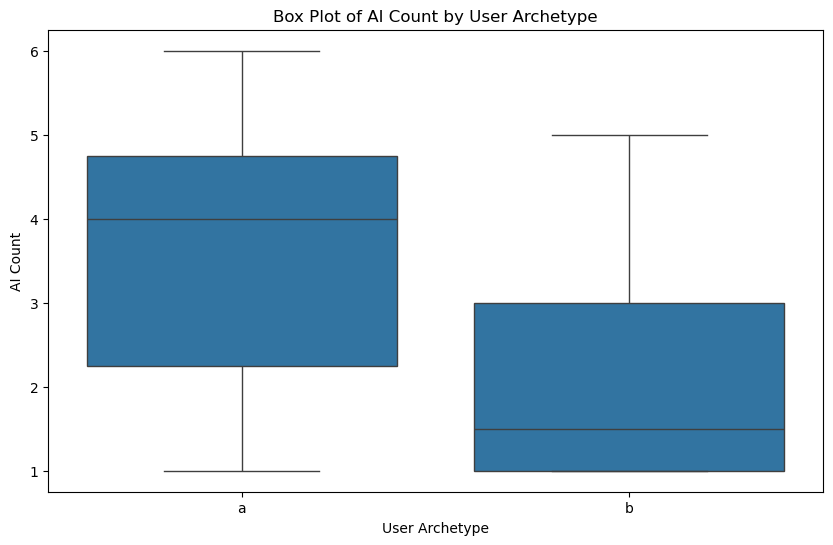

In [98]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_archetype', y='ai_count', data=click_count_demographic.drop(columns=['guideline_count']).dropna())
plt.title('Box Plot of AI Count by User Archetype')
plt.xlabel('User Archetype')
plt.ylabel('AI Count')
plt.show()

# legend_clicks

In [34]:
legend_clicks.variable.value_counts()

variable
Respiratory Rate                        10
Systolic Blood Pressure                  7
Mean Arterial Pressure                   7
Diastolic Blood Pressure                 5
Glasgow Coma Score                       5
Glasgow Coma Score - motor response      5
Temperature                              4
Heart Rate                               4
SpO2                                     4
Mean Blood Pressure                      3
Glasgow Coma Score - verbal response     3
Glasgow Coma Score – eye opening         2
Name: count, dtype: int64

In [35]:
legend_clicks.user_id.nunique()
print('percentage that clicked on graph: %.2f' % (legend_clicks.user_id.nunique()/len(demographics)*100))

6

percentage that clicked on graph: 16.22
